C++
====

A brief introduction to features of C++ that are not found in C, using C++11 features where possible. We will assume the following `#includes` in the code snippets. As usual, we will exclude classes and any discussion of object-oriented programming.

```c++
#include <iostream>
#include <vector>
#include <unordered_map>
#include <algorithm>
#include <numeric>
#include <iterator>
#include "/usr/local/include/armadillo"
```

### Hello, world

Note the use of the `iostream` library and the standard namepace qualification `std::cout`.

```c++
int main()
{
    std::cout << "Hello, world!\n";
}
```

### Namespaces

Just like Python, C++ has namespaces that allow us to build large libraries without worrying about name collisions. In the `Hello world` program, we used the explicit name `std::cout` indicating that `cout` is a member of the standard workspace. We can also use the `using` keyword to import selected functions or classes from a namespace. 

```c++
using std::cout;

int main()
{
    cout << "Hello, world!\n";
}
```

For small programs, we sometimes import the entire namespace for convenience, but this may cause namespace collisions in larger programs.

```c++
using namespace std;

int main()
{
    cout << "Hello, world!\n";
}
```

You can easily create your own namespace.

```c++
namespace sta_663 {
    const double pi=2.14159;

    void greet(string name) {
        cout << "\nTraditional first program\n";
        cout << "Hello, " << name << "\n";
    }
}

int main() 
{
    cout << "\nUsing namespaces\n";
    string name = "Tom";
    cout << sta_663::pi << "\n";
    sta_663::greet(name);
}
```

### Looping

Note the traditional for loop and the new range for loop. There is also a `while` loop (not shown).

```c++
// for loops
int main() 
{
    int x[] = {1, 2, 3, 4, 5};

    cout << "\nTraditional for loop\n";
    for (int i=0; i < sizeof(x)/sizeof(x[0]); i++) {
        cout << i << endl;
    }

    cout << "\nRanged for loop\n\n";
    for (auto &i : x) {
        cout << i << endl;
    }
}
```

**Exercise 1**

Use loop to generate the 12 by 12 times table. Compile and run. You don't have to worry much about formatting, but the output should have 12 rows with numbers separated by spaces.

In [1]:
%%file ex1.cpp
#include <iostream>
#include <iomanip>

int main()
{
    for (int i=1; i<=12; i++) {
        for (int j=1; j<=12; j++) {
            std::cout << std::setw(3) << i*j << ' ';
        }
        std::cout << "\n";
    }
}

Overwriting ex1.cpp


In [2]:
%%bash
g++ ex1.cpp -o ex1

In [3]:
%%bash
./ex1

  1   2   3   4   5   6   7   8   9  10  11  12 
  2   4   6   8  10  12  14  16  18  20  22  24 
  3   6   9  12  15  18  21  24  27  30  33  36 
  4   8  12  16  20  24  28  32  36  40  44  48 
  5  10  15  20  25  30  35  40  45  50  55  60 
  6  12  18  24  30  36  42  48  54  60  66  72 
  7  14  21  28  35  42  49  56  63  70  77  84 
  8  16  24  32  40  48  56  64  72  80  88  96 
  9  18  27  36  45  54  63  72  81  90  99 108 
 10  20  30  40  50  60  70  80  90 100 110 120 
 11  22  33  44  55  66  77  88  99 110 121 132 
 12  24  36  48  60  72  84  96 108 120 132 144 


### Functions and Lambdas

```c++
// simple funciton
int add0(int a, int b) {
    return a + b;
}

// simple function with reference variables
void add1(int a, int b, int& c) {
    c = a + b;
}

// lambda function
auto add2 = [] (int a, int b) { return a + b; };

int main() {

    cout << "\nStandard function\n";
    int a = 3, b = 4;
    cout << add0(a, b) <<  endl;

    int c = 0;
    cout << "\nStandard with reference varaibles\n";

    add1(a, b, c);
    cout << c <<  endl;

    cout << "\nLambda function\n";
    cout << add2(a, b) <<  endl;

    auto add3 = [c] (int a, int b) { return c * add2(a, b); };

    c -= 5;
    cout << "\nLambda function with value capture\n";
    cout << add3(a, b) <<  endl;

    auto add4 = [&c] (int a, int b) { return c * add2(a, b); };

    cout << "\nLambda function with reference capture\n";
    cout << add4(a, b) <<  endl;

}
```

### Templates

```c++
// templates
template <typename T>
T add5(T a, T b) { return a + b; }

int main() 
{

    cout << "\nTemplate function with ints\n";
    cout << add5(3, 4) << endl;

    cout << "\nTemplate function with doubles\n";
    cout << add5(3.14, 2.78) << endl;
}
```

### Iterators

```c++
int main() 
{
    int x[] = {1, 2, 3, 4, 5};

    cout << "\nUsing iterators\n";
    for (auto it=begin(x); it != end(x); it++) {
        cout << *it << endl;
    }
}
```

### Containers

```c++
int main() 
{
    vector<double> v = {1,2,3};

    cout << "\nUsing the vector container\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << endl;
    }

    v.push_back(4);
    v.push_back(5);
    cout << "\nGrowing the vector container\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << endl;
    }

    v.pop_back();
    cout << "\nShrinking the vector container\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << endl;
    }

    cout << "\nUsing the unordered_map container\n";
    unordered_map<string, int> dict =  { {"ann", 23}, {"bob", 32}, {"charles", 17}};
    dict["doug"] = 30;
    for (auto it=begin(dict); it != end(dict); it++) {
        cout << it->first << ", " << it->second << endl;
    }

    cout << dict["bob"] << endl;
}
```

**Exercise 2**
 
Write a function that takes a vector of doubles  returns the squared vector. Compile and run the function with the initial vector containing 1.0, 2.0, 3.0, 4.0, 5.0.

In [4]:
%%file ex2.cpp
#include <iostream>
#include <vector>
using std::vector;
using std::cout;

vector<double> squares(vector<double> xs) {
    vector<double> ys(xs.size());
    for (int i=0; i<ys.size(); i++) {
        ys[i] = xs[i] * xs[i];
    }
    return ys;
}

int main()
{
    vector<double> xs = {1.0, 2.0, 3.0, 4.0, 5.0};

    auto ys = squares(xs);

    for (auto& y: ys) {
        cout << y << ", ";
    }
    cout << "\n";
}

Overwriting ex2.cpp


In [5]:
%%bash
g++ -std=c++11 ex2.cpp -o ex2

In [6]:
%%bash
./ex2

1, 4, 9, 16, 25, 


**EXercise 3**

Convert the function from Exercise 2 so that it works for lists or vectors of ints, floats and doubles.

In [7]:
%%file ex3.cpp
#include <iostream>
#include <vector>
using std::vector;
using std::cout;

template<typename T>
vector<T> squares(vector<T> xs) {
    vector<T> ys(xs.size());
    for (int i=0; i<ys.size(); i++) {
        ys[i] = xs[i] * xs[i];
    }
    return ys;
}

int main()
{
    vector<int> xs = {1, 2, 3, 4, 5};

    auto ys = squares(xs);

    for (auto& y: ys) {
        cout << y << ", ";
    }
    cout << "\n";
}

Overwriting ex3.cpp


In [8]:
%%bash
./ex3

1, 4, 9, 16, 25, 


### Algorithms

```c++
int main()
{
void show_algorithms() {
    vector<int> v(10, 0);

    cout << "\nWorking with standard library algorithm\n";
    cout << "\nInitial state\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << " ";
    }
    cout << endl;

    cout << "\nAfter iota\n";
    iota(begin(v), end(v), 5);
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << " ";
    }
    cout << endl;

    cout << "\nSimple accumulate\n";
    int s = accumulate(begin(v), end(v), 0);
    cout << s << endl;

    cout << "\nAccumulate with custom sum of squares reduction\n";
    int t = accumulate(begin(v), end(v), 0, [] (int acc, int x) { return acc + x*x; });
    cout << t << endl;
}
```

**Exercise 4**

Write a function to calculate the mean of a vector of numbers using `accumulate` from the `<numeric>` library. Compile and test with some vectors.

In [9]:
%%file ex4.cpp
#include <iostream>
#include <vector>
#include <numeric>
using std::vector;
using std::cout;

template<typename T>
double mean(vector<T> xs) {
    double s = std::accumulate(begin(xs), end(xs), 0);
    return s/xs.size();
}

int main()
{
    vector<double> xs = {1, 2, 3, 4, 5};
    
    double mu = mean(xs);
    cout << mu << "\n";
}


Overwriting ex4.cpp


In [10]:
%%bash
g++ -std=c++11 ex4.cpp -o ex4

In [11]:
%%bash
./ex4

3


### Function pointers

```c++
int main() 
{
    cout << "\nUsing generalized function pointers\n";
    using func = function<double(double, double)>;

    auto f1 = [](double x, double y) { return x + y; };
    auto f2 = [](double x, double y) { return x * y; };
    auto f3 = [](double x, double y) { return x + y*y; };

    double x = 3, y = 4;

    vector<func> funcs = {f1, f2, f3,};

    for (auto& f : funcs) {
        cout << f(x, y) << "\n";
    }
}
```

**Exercise 5**

Implement Newton's method in 1D for root finding. Pass in the function and gradient as generalized function pointers. Use the method to find all roots of the polynomial equation $f(x) = x^3 - 7x - 6$

In [1]:
%%file ex5.cpp
#include <iostream>
#include <vector>
#include <numeric>
#include <iomanip>
#include <cmath>
#include <functional> 
using std::vector;
using std::cout;
using std::function;

using func = function<double(double)>;

double newton(double x0, func f, func grad, int max_iter=10) {
    double x = x0;
    for (int i=0; i<max_iter; i++) {
        x -= f(x)/grad(x);
    }
    return x;
}

int main()
{
    
    auto f = [](double x) { return pow(x, 3) - 7*x - 6; };
    auto grad = [](double x) { return 3.0*pow(x, 2) - 7; };
    
    vector<double> x = {-5, 0, 5};
    for (auto& x0: x) {
        cout << std::setw(2) << x0 << ": " << std::setw(3) << newton(x0, f, grad) << "\n";
    }
}

Writing ex5.cpp


In [2]:
%%bash
g++ -std=c++11 ex5.cpp -o ex5

In [3]:
%%bash
./ex5

-5:  -2
 0:  -1
 5:   3


### Random numbers

C++ now comes with its own collection of random number generators and quite a broad selection of distributions. See [here](http://www.open-std.org/jtc1/sc22/wg21/docs/papers/2013/n3551.pdf) for a great explanation.

```c++
int main() 
{
    cout << "\nGenerating random numbers\n";

    // start random number engine wiht fixed seed
    default_random_engine re{12345};

    uniform_int_distribution<int> uniform(1,6); // lower and upper bounds
    poisson_distribution<int> poisson(30); // rate
    student_t_distribution<double> t(10); // degrees of freedom

    auto runif = bind (uniform, re);
    auto rpois = bind(poisson, re);
    auto rt = bind(t, re);

    for (int i=0; i<10; i++) {
        cout << runif() << ", " << rpois() <<  ", " << rt() << "\n";

    }
}
```

**Exercise 6**

Generate 1000 random points from the exponential distribution and save as a comma-separated values (CSV) file. Open the file in Python and plot the distribution using `plt.hist`.

In [15]:
%%file ex6.cpp
#include <fstream>
#include <random>
#include <iomanip>
using std::ofstream;
using std::default_random_engine;
using std::exponential_distribution;

int main() 
{
    // start random number engine wiht fixed seed
    default_random_engine re;
    re.seed(12345);

    exponential_distribution<double> exponential(1.0); 

    auto rexp = bind (exponential, re);

    int n = 1000;
    ofstream fout("rexp.csv");
    fout << rexp();
    for (int i=1; i<n; i++) {
        fout << "," << rexp();
    }
    fout << "\n";
}

Overwriting ex6.cpp


In [16]:
%%bash
g++ -std=c++11 ex6.cpp -o ex6

In [17]:
%%bash
./ex6

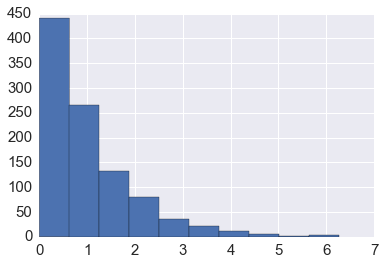

In [18]:
xs = np.loadtxt('rexp.csv', delimiter=',')
plt.hist(xs)
pass

### Numeric library

Armadillo is an accessible library for doing numeric operations, much like `numpy` in  Python. Please see [official documentation](http://arma.sourceforge.net/docs.html) for details. It provides vectors, matrices, tensors, linear algebra, statistical functions and a limited set of convenient random number generators.

```c++
int main() 
{
    using namespace arma;

    vec u = linspace<vec>(0,1,5);
    vec v = ones<vec>(5);
    mat A = randu<mat>(4,5); // uniform random deviates
    mat B = randn<mat>(4,5); // normal random deviates

    cout << "\nVecotrs in Armadillo\n";
    cout << u << endl;
    cout << v << endl;
    cout << u.t() * v << endl;

    cout << "\nRandom matrices in Armadillo\n";
    cout << A << endl;
    cout << B << endl;
    cout << A * B.t() << endl;
    cout << A * v << endl;

    cout << "\nQR in Armadillo\n";
    mat Q, R;
    qr(Q, R, A.t() * A);
    cout << Q << endl;
    cout << R << endl;
}
```




**Exercise 7**

Use the armadillo library to

- Generate 10 x-coordinates linearly spaced between 10 and 15
- Generate 10 random y-values as $y = 3x^2 - 7x + 2 + \epsilon$ where $\epsilon \sim 10 N(0,1)$
- Find the length of $x$ and $y$ and the Euclidean distance between $x$ and $y$
- Find the correlation between $x$ and $y$
- Solve the linear system to find a quadratic fit for this data

In [4]:
%%file ex7.cpp
#include <iostream>
#include <fstream>
#include <armadillo>
using std::cout;
using std::ofstream;

int main() 
{
    using namespace arma;

    vec x = linspace<vec>(10.0,15.0,10);
    vec eps = 10*randn<vec>(10);
    vec y = 3*x%x - 7*x + 2 + eps; 

    cout << "x:\n" << x << "\n";
    cout << "y:\n" << y << "\n";

    cout << "Lenght of x is: " << norm(x) << "\n";
    cout << "Lenght of y is: " << norm(y) << "\n";

    cout << "Distance(x, y) is: " << norm(x -y) << "\n";

    cout << "Correlation(x, y) is: " << cor(x, y) << "\n";

    mat A = join_rows(ones<vec>(10), x);
    A = join_rows(A, x%x);
    cout << "A:\n" << A << "\n";

    vec b = solve(A, y);
    cout << "b:\n" << b << "\n";

    ofstream fout1("x.txt");
    x.print(fout1);
    ofstream fout2("y.txt");
    y.print(fout2);
    ofstream fout3("b.txt");
    b.print(fout3);
}

Writing ex7.cpp


In [5]:
%%bash
g++ -std=c++11 ex7.cpp -o ex7 -larmadillo 

In [6]:
%%bash
./ex7

x:
   10.0000
   10.5556
   11.1111
   11.6667
   12.2222
   12.7778
   13.3333
   13.8889
   14.4444
   15.0000

y:
   2.4802e+02
   2.6412e+02
   2.9157e+02
   3.3056e+02
   3.4089e+02
   3.9573e+02
   4.4029e+02
   4.7583e+02
   5.2827e+02
   5.8404e+02

Lenght of x is: 39.8493
Lenght of y is: 1280.16
Distance(x, y) is: 1240.76
Correlation(x, y) is:    0.9887

A:
   1.0000e+00   1.0000e+01   1.0000e+02
   1.0000e+00   1.0556e+01   1.1142e+02
   1.0000e+00   1.1111e+01   1.2346e+02
   1.0000e+00   1.1667e+01   1.3611e+02
   1.0000e+00   1.2222e+01   1.4938e+02
   1.0000e+00   1.2778e+01   1.6327e+02
   1.0000e+00   1.3333e+01   1.7778e+02
   1.0000e+00   1.3889e+01   1.9290e+02
   1.0000e+00   1.4444e+01   2.0864e+02
   1.0000e+00   1.5000e+01   2.2500e+02

b:
   5.8621e+02
  -1.0156e+02
   6.7586e+00



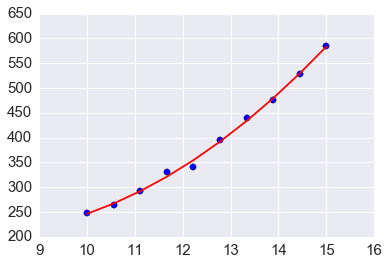

In [7]:
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
b = np.loadtxt('b.txt')

plt.scatter(x, y, s=40)
plt.plot(x, b[0] + b[1]*x + b[2]*x**2, c='red')
pass

### Collected source code

In [23]:
%%file main.cpp
#include <iostream>
#include <vector>
#include <unordered_map>
#include <algorithm>
#include <numeric>
#include <iterator>
#include <functional>
#include <random>
#include <armadillo>

using namespace std;

/* Topics
 *
 * - for loop
 *
 *
 * - functions
 * - lambdas
 * - templates
 *
 * - iterators
 * - containers
 * - algorithms
 * - Armadillo
*/

// hello world
void show_hello() {
    cout << "Hello, world!\n";
}

namespace sta_663 {
    const double pi=2.14159;

    void greet(string name) {
        cout << "\nTraditional first program\n";
        cout << "Hello, " << name << "\n";
    }
}

void show_namespace() {
    cout << "\nUsing namespaces\n";
    string name = "Tom";
    cout << sta_663::pi << "\n";
    sta_663::greet(name);
}


// for loops
void show_for() {
    int x[] = {1, 2, 3, 4, 5};

    cout << "\nTraditional for loop\n";
    for (int i=0; i < sizeof(x)/sizeof(x[0]); i++) {
        cout << i << endl;
    }

    cout << "\nRanged for loop\n\n";
    for (auto &i : x) {
        cout << i << endl;
    }
}

// simple funciton
int add0(int a, int b) {
    return a + b;
}

// simple function with reference variables
void add1(int a, int b, int& c) {
    c = a + b;
}

// lambda function
auto add2 = [] (int a, int b) { return a + b; };

void show_func() {

    cout << "\nStandard function\n";
    int a = 3, b = 4;
    cout << add0(a, b) <<  endl;

    int c = 0;
    cout << "\nStandard with reference varaibles\n";

    add1(a, b, c);
    cout << c <<  endl;

    cout << "\nLambda function\n";
    cout << add2(a, b) <<  endl;

    auto add3 = [c] (int a, int b) { return c * add2(a, b); };

    c -= 5;
    cout << "\nLambda function with value capture\n";
    cout << add3(a, b) <<  endl;

    auto add4 = [&c] (int a, int b) { return c * add2(a, b); };

    cout << "\nLambda function with reference capture\n";
    cout << add4(a, b) <<  endl;

}

// templates
template <typename T>
T add5(T a, T b) { return a + b; }

void show_template() {

    cout << "\nTemplate function with ints\n";
    cout << add5(3, 4) << endl;

    cout << "\nTemplate function with doubles\n";
    cout << add5(3.14, 2.78) << endl;
}

void show_iterators() {
    int x[] = {1, 2, 3, 4, 5};

    cout << "\nUsing iterators\n";
    for (auto it=begin(x); it != end(x); it++) {
        cout << *it << endl;
    }
}

void show_containers() {
    vector<double> v = {1,2,3};

    cout << "\nUsing the vector container\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << endl;
    }

    v.push_back(4);
    v.push_back(5);
    cout << "\nGrowing the vector container\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << endl;
    }

    v.pop_back();
    cout << "\nShrinking the vector container\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << endl;
    }

    cout << "\nUsing the unordered_map container\n";
    unordered_map<string, int> dict =  { {"ann", 23}, {"bob", 32}, {"charles", 17}};
    dict["doug"] = 30;
    for (auto it=begin(dict); it != end(dict); it++) {
        cout << it->first << ", " << it->second << endl;
    }

    cout << dict["bob"] << endl;
}

void show_algorithms() {
    vector<int> v(10, 0);

    cout << "\nWorking with standard library algorithm\n";
    cout << "\nInitial state\n";
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << " ";
    }
    cout << endl;

    cout << "\nAfter iota\n";
    iota(begin(v), end(v), 5);
    for (auto it=begin(v); it != end(v); it++) {
        cout << *it << " ";
    }
    cout << endl;

    cout << "\nSimple accumulate\n";
    int s = accumulate(begin(v), end(v), 0);
    cout << s << endl;

    cout << "\nAccumulate with custom sum of squares reduction\n";
    int t = accumulate(begin(v), end(v), 0, [] (int acc, int x) { return acc + x*x; });
    cout << t << endl;
}

void show_functional() {

    cout << "\nUsing generalized function pointers\n";
    using func = function<double(double, double)>;

    auto f1 = [](double x, double y) { return x + y; };
    auto f2 = [](double x, double y) { return x * y; };
    auto f3 = [](double x, double y) { return x + y*y; };

    double x = 3, y = 4;

    vector<func> funcs = {f1, f2, f3,};

    for (auto& f : funcs) {
        cout << f(x, y) << "\n";
    }

}

void show_random() {
    cout << "\nGenerating random numbers\n";

    // start random number engine wiht fixed seed
    default_random_engine re{12345};

    uniform_int_distribution<int> uniform(1,6); // lower and upper bounds
    poisson_distribution<int> poisson(30); // rate
    student_t_distribution<double> t(10); // degrees of freedom

    auto runif = bind (uniform, re);
    auto rpois = bind(poisson, re);
    auto rt = bind(t, re);

    for (int i=0; i<10; i++) {
        cout << runif() << ", " << rpois() <<  ", " << rt() << "\n";
    }
}

void show_amrmadillo() {
    using namespace arma;

    vec u = linspace<vec>(0,1,5);
    vec v = ones<vec>(5);
    mat A = randu<mat>(4,5);
    mat B = randn<mat>(4,5);

    cout << "\nVecotrs in Armadillo\n";
    cout << u << endl;
    cout << v << endl;
    cout << u.t() * v << endl;

    cout << "\nRandom matrices in Armadillo\n";
    cout << A << endl;
    cout << B << endl;
    cout << A * B.t() << endl;
    cout << A * v << endl;

    cout << "\nQR in Armadillo\n";
    mat Q, R;
    qr(Q, R, A.t() * A);
    cout << Q << endl;
    cout << R << endl;
}

int main() {
    show_hello();
    show_namespace();
    show_for();
    show_func();
    show_template();
    show_iterators();
    show_containers();
    show_algorithms();
    show_functional();
    show_random();
    show_amrmadillo();
}

Overwriting main.cpp


Compilation
----

In [1]:
%%bash
g++ -std=c++11 -o main ex6.cpp -larmadillo

Execution
----

In [2]:
%%bash

./main

x:
   10.0000
   10.5556
   11.1111
   11.6667
   12.2222
   12.7778
   13.3333
   13.8889
   14.4444
   15.0000

y:
   2.4802e+02
   2.6412e+02
   2.9157e+02
   3.3056e+02
   3.4089e+02
   3.9573e+02
   4.4029e+02
   4.7583e+02
   5.2827e+02
   5.8404e+02

Lenght of x is: 39.8493
Lenght of y is: 1280.16
Distance(x, y) is: 1240.76
Correlation(x, y) is:    0.9887

A:
   1.0000e+00   1.0000e+01   1.0000e+02
   1.0000e+00   1.0556e+01   1.1142e+02
   1.0000e+00   1.1111e+01   1.2346e+02
   1.0000e+00   1.1667e+01   1.3611e+02
   1.0000e+00   1.2222e+01   1.4938e+02
   1.0000e+00   1.2778e+01   1.6327e+02
   1.0000e+00   1.3333e+01   1.7778e+02
   1.0000e+00   1.3889e+01   1.9290e+02
   1.0000e+00   1.4444e+01   2.0864e+02
   1.0000e+00   1.5000e+01   2.2500e+02

b:
   5.8621e+02
  -1.0156e+02
   6.7586e+00

